In [61]:
import json
import requests

import pandas as pd
from PIL import Image

In [71]:
def image_from_url(url):
    img = Image.open(requests.get(url, stream=True).raw)
    return img.resize((img.width // 10, img.height // 10))

In [150]:
df = pd.read_csv('./data/media.csv', usecols=['url', 'descriptionHebrew', 'descriptionEnglish', 'tags'])

In [154]:
empty_tag_placeholder = '{"tags": []}'

df.loc[df.tags == empty_tag_placeholder, 'tags'] = None

In [141]:
%%bash

cat ./data/kalos-media-tagging.sql | grep INSERT | wc -l | xargs echo "Number of rows in the table:"

Number of rows in the table: 4610


In [210]:
cond = df.loc[:, ['descriptionHebrew', 'descriptionEnglish', 'tags']].notnull().all(axis=1)

# drop rows with all field missing values
df = df.loc[cond]

print(f"Number of rows after dropping rows with all missing values: {df.shape[0]}")

Number of rows after dropping rows with all missing values: 2515


In [212]:
# make tags accessible
df.loc[:, 'tags'] = df.tags.apply(json.loads)

In [228]:
# remove extra whitespace
df.loc[:, 'descriptionHebrew'] = df.descriptionHebrew.str.replace(r'\s+', ' ', regex=True)
df.loc[:, 'descriptionEnglish'] = df.descriptionEnglish.str.replace(r'\s+', ' ', regex=True)

In [229]:
df.describe(include='object').T

,count,unique,top,freq
url,2515,2515,https://storage.googleapis.com/press-office-de...,1
descriptionHebrew,2515,1997,שלג בירושלים.,32
descriptionEnglish,2515,2047,Snow in Jerusalem.,32
tags,2515,2237,"{'tags': ['בנימין נתניהו', 'נתניהו בנימין', 'ב...",28


In [230]:
df.loc[:, ['descriptionEnglish', 'descriptionHebrew', 'tags']].sample(5)

,descriptionEnglish,descriptionHebrew,tags
3656,MUNICIPAL SANIATION WORKERS WASHING THE BLOOD ...,עובדי עירייה שוטפים את כתמי הדם מהמדרכה מול מש...,"{'tags': ['9.3', 'עובדים', 'עיריה', 'שטיפה', '..."
879,QUEEN BEATRIX OF THE NETHERLANDS DURING A LUNC...,מלכת הולנד ביאטריקס סועדת בבית ראש הממשלה בירו...,"{'tags': ['ראש הממשלה', 'מלכת הולנד', 'ביאטריק..."
3898,"GENERAL VIEW OF BRIDGES, PART OF ROAD 9 - A MA...",גשרים בכביש 9 החדש בכניסה לירושלים.,"{'tags': ['כביש', 'ירושלים', 'כביש מהיר', 'תחב..."
3585,FOREIGN MIN. MOSHE DAYAN AND GOVERNMENT LEGAL ...,שר החוץ משה דיין והיועץ המשפטי לממשלה אהרן ברק...,"{'tags': ['1.4', 'ראש ממשלה', 'מנחם בגין', 'ני..."
3419,A WOMAN ELECTRICIAN WORKING AS A LINESMAN DURI...,"מלחמת העצמאות. בצילום, אשה המועסקת כקוונית חשמל.","{'tags': ['16.1', 'LINESMAN', 'WOMAN', 'WORKER..."


id: 503
descriptionHebrew:
ראש הממשלה לוי אשכול ורעייתו מרים הולכים למטוס בנמל התעופה בלוד, לפני צאתם לביקור באפריקה.
descriptionEnglish:
P.M LEVY ESHKOL AND HIS WIFE MIRIAM PROCEEDING TO THE PLANE, AT LOD AIRPORT, BEFORE THEIR DEPARTURE FOR AFRICA.
tags:
{'tags': ['1.4', 'לוי אשכול', 'נמל תעופה', 'לוד', 'מרים אשכול', 'קבלת פנים', 'אבא אבן', 'משמר כבוד', 'צה"ל', 'מסדר כבוד', 'פרידה', 'טקס']}


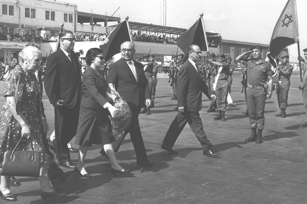

In [240]:
row = df.sample(1)
print('id:', row.index.values[0])
print('descriptionHebrew:')
print(row['descriptionHebrew'].values[0])
print('descriptionEnglish:')
print(row['descriptionEnglish'].values[0])
print('tags:')
print(row['tags'].values[0])

image_from_url(row['url'].values[0])

In [237]:
# save the cleaned data
df.to_parquet('./data/media_cleaned.pqt')

In [238]:
%%bash
ls -lh ./data/

total 8.6M
-rwxrwxrwx 1 noyk noyk 2.9M Jun 28 10:43 kalos-media-tagging-fixed.sql
-rwxrwxrwx 1 noyk noyk 2.9M Jun 28 10:43 kalos-media-tagging.sql
-rwxrwxrwx 1 noyk noyk 2.5M Jun 28 20:48 media.csv
-rwxrwxrwx 1 noyk noyk 468K Jun 29 11:29 media_cleaned.pqt
